# TRÁFICO VEHICULAR ANI

## Conjunto de datos a emplear

El conjunto de datos que se utilizará en este proyecto será el del tráfico vehicular de la Agencia Nacional de Infraestructura (ANI) el cual registra el tráfico de vehículos que circulan en los peajes de la ANI. En la website https://www.datos.gov.co/Transporte/Tr-fico-Vehicular-ANI/8yi9-t44c se presenta información básica acerca de dicha base de datos, como es la fecha de su creación (24 de marzo de 2021), la frecuencia de actualización (semestral), las dimensiones (alrededor de 115 mil filas y 9 columnas), los nombres de los campos junto con su tipo de dato y una vista previa de la tabla.

Los datos se importarán por medio de la librería Socrata de Python con el objetivo inicial de realizar un análisis exploratorio de los datos y así tener un mejor entendimiento de la información contenida allí. Antes de cargar el set de datos, es importante instalar el módulo *sodapy* con el comando *pip install sodapy*.

## Exploración de los datos

### Importación de librerías

In [1]:
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Cargue de datos

In [2]:
client = Socrata('www.datos.gov.co', None)
tempTr = client.get("8yi9-t44c", limit=200000)
datos = pd.DataFrame.from_records(tempTr) 
datos.head()

,idpeaje,peaje,categoriatarifa,desde,hasta,valortarifa,cantidadtrafico,cantidadevasores,cantidadexentos787
0,1,ALVARADO,I,2015-08-21T00:00:00.000,2015-08-31T00:00:00.000,7000,27730,0,660
1,1,ALVARADO,II,2015-08-21T00:00:00.000,2015-08-31T00:00:00.000,7600,9930,0,70
2,1,ALVARADO,III,2015-08-21T00:00:00.000,2015-08-31T00:00:00.000,16100,1277,0,0
3,1,ALVARADO,IV,2015-08-21T00:00:00.000,2015-08-31T00:00:00.000,20400,2074,0,0
4,1,ALVARADO,V,2015-08-21T00:00:00.000,2015-08-31T00:00:00.000,22900,4167,0,0


### Información del conjunto de datos

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114797 entries, 0 to 114796
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   idpeaje             114797 non-null  object
 1   peaje               114797 non-null  object
 2   categoriatarifa     114797 non-null  object
 3   desde               114797 non-null  object
 4   hasta               114797 non-null  object
 5   valortarifa         114797 non-null  object
 6   cantidadtrafico     114797 non-null  object
 7   cantidadevasores    96935 non-null   object
 8   cantidadexentos787  96990 non-null   object
dtypes: object(9)
memory usage: 7.9+ MB


### Identificación de valores nulos

In [4]:
datos.isna().sum()

idpeaje                   0
peaje                     0
categoriatarifa           0
desde                     0
hasta                     0
valortarifa               0
cantidadtrafico           0
cantidadevasores      17862
cantidadexentos787    17807
dtype: int64

### Transformación y agregación de variables

In [5]:
datos.desde = pd.to_datetime(datos.desde)
datos.hasta = pd.to_datetime(datos.hasta)
datos.valortarifa = datos.valortarifa.astype('int')
datos.cantidadtrafico = datos.cantidadtrafico.astype('int')
datos.cantidadevasores = datos.cantidadevasores.apply(pd.to_numeric, errors='coerce')
datos.cantidadexentos787 = datos.cantidadexentos787.apply(pd.to_numeric, errors='coerce')
datos['año'] = pd.DatetimeIndex(datos['hasta']).year
datos['añomes'] = pd.to_datetime(datos.hasta).dt.to_period('M')
datos['recaudo'] = datos.valortarifa * datos.cantidadtrafico

datos.head()

,idpeaje,peaje,categoriatarifa,desde,hasta,valortarifa,cantidadtrafico,cantidadevasores,cantidadexentos787,año,añomes,recaudo
0,1,ALVARADO,I,2015-08-21,2015-08-31,7000,27730,0.0,660.0,2015,2015-08,194110000
1,1,ALVARADO,II,2015-08-21,2015-08-31,7600,9930,0.0,70.0,2015,2015-08,75468000
2,1,ALVARADO,III,2015-08-21,2015-08-31,16100,1277,0.0,0.0,2015,2015-08,20559700
3,1,ALVARADO,IV,2015-08-21,2015-08-31,20400,2074,0.0,0.0,2015,2015-08,42309600
4,1,ALVARADO,V,2015-08-21,2015-08-31,22900,4167,0.0,0.0,2015,2015-08,95424300


### Estadísticas descriptivas

In [6]:
round(datos.describe()).T

,count,mean,min,25%,50%,75%,max,std
desde,114797,2018-10-16 13:46:23.456013568,2014-01-01 00:00:00,2016-07-01 00:00:00,2018-10-01 00:00:00,2021-03-01 00:00:00,2023-05-01 00:00:00,NaN
hasta,114797,2018-11-12 06:45:22.085072128,2014-01-04 00:00:00,2016-07-31 00:00:00,2018-10-31 00:00:00,2021-03-31 00:00:00,2023-05-31 00:00:00,NaN
valortarifa,114797.0,17933.0,0.0,7100.0,11500.0,25100.0,161300.0,16817.0
cantidadtrafico,114797.0,19888.0,0.0,309.0,3662.0,13824.0,1124159.0,55711.0
cantidadevasores,96935.0,0.0,0.0,0.0,0.0,0.0,4006.0,22.0
cantidadexentos787,96990.0,209.0,0.0,0.0,1.0,55.0,101300.0,739.0
año,114797.0,2018.0,2014.0,2016.0,2018.0,2021.0,2023.0,3.0
recaudo,114797.0,175947257.0,-2145995796.0,1352400.0,53413000.0,234088800.0,2147238600.0,367292983.0


In [7]:
datos.describe(include='object')

,idpeaje,peaje,categoriatarifa
count,114797,114797,114797
unique,147,147,45
top,83,TUTA,I
freq,1563,1563,12914


### Gráficos de caja de algunas variables numéricas

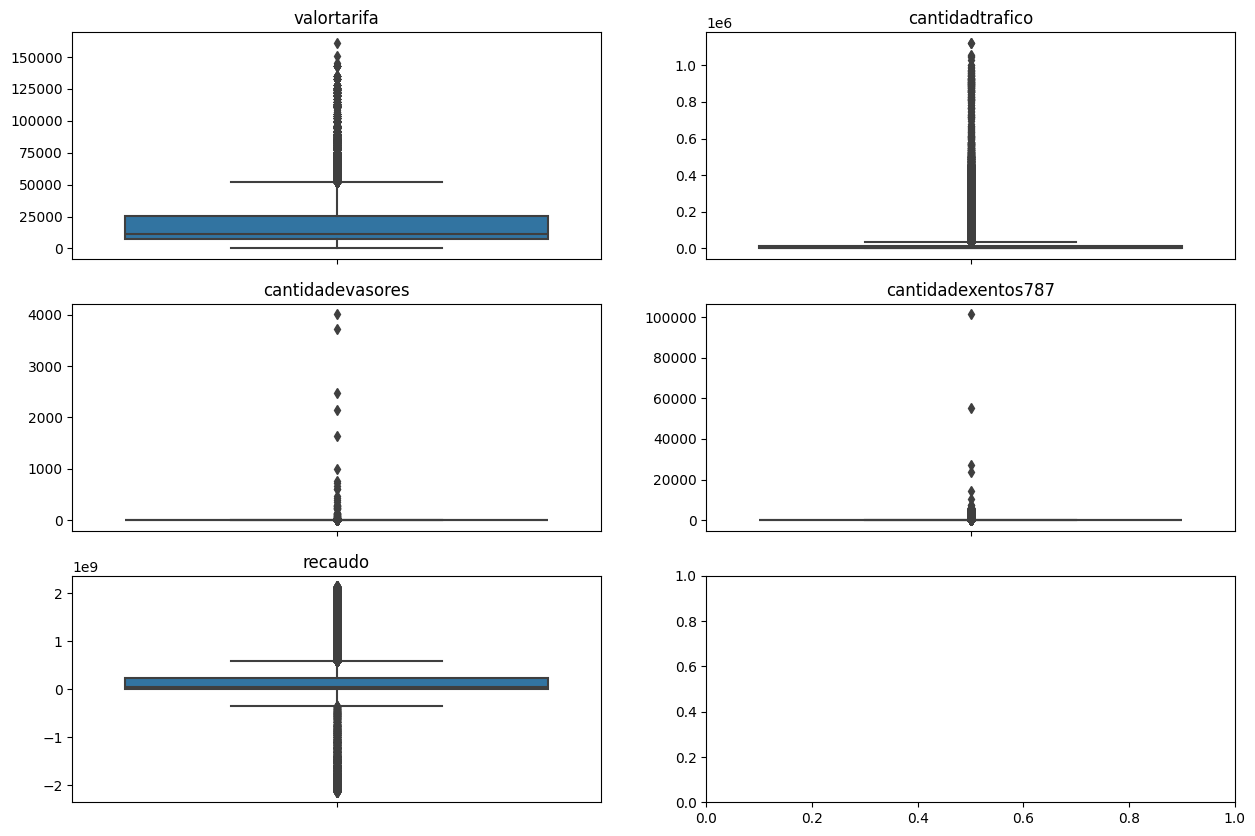

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=datos.valortarifa).set(title='valortarifa', xticklabels=[])
sns.boxplot(ax=axes[0, 1], data=datos.cantidadtrafico).set(title='cantidadtrafico', xticklabels=[])
sns.boxplot(ax=axes[1, 0], data=datos.cantidadevasores).set(title='cantidadevasores', xticklabels=[])
sns.boxplot(ax=axes[1, 1], data=datos.cantidadexentos787).set(title='cantidadexentos787', xticklabels=[])
sns.boxplot(ax=axes[2, 0], data=datos.recaudo).set(title='recaudo', xticklabels=[])
plt.show()

### Histograma de algunas variables numéricas

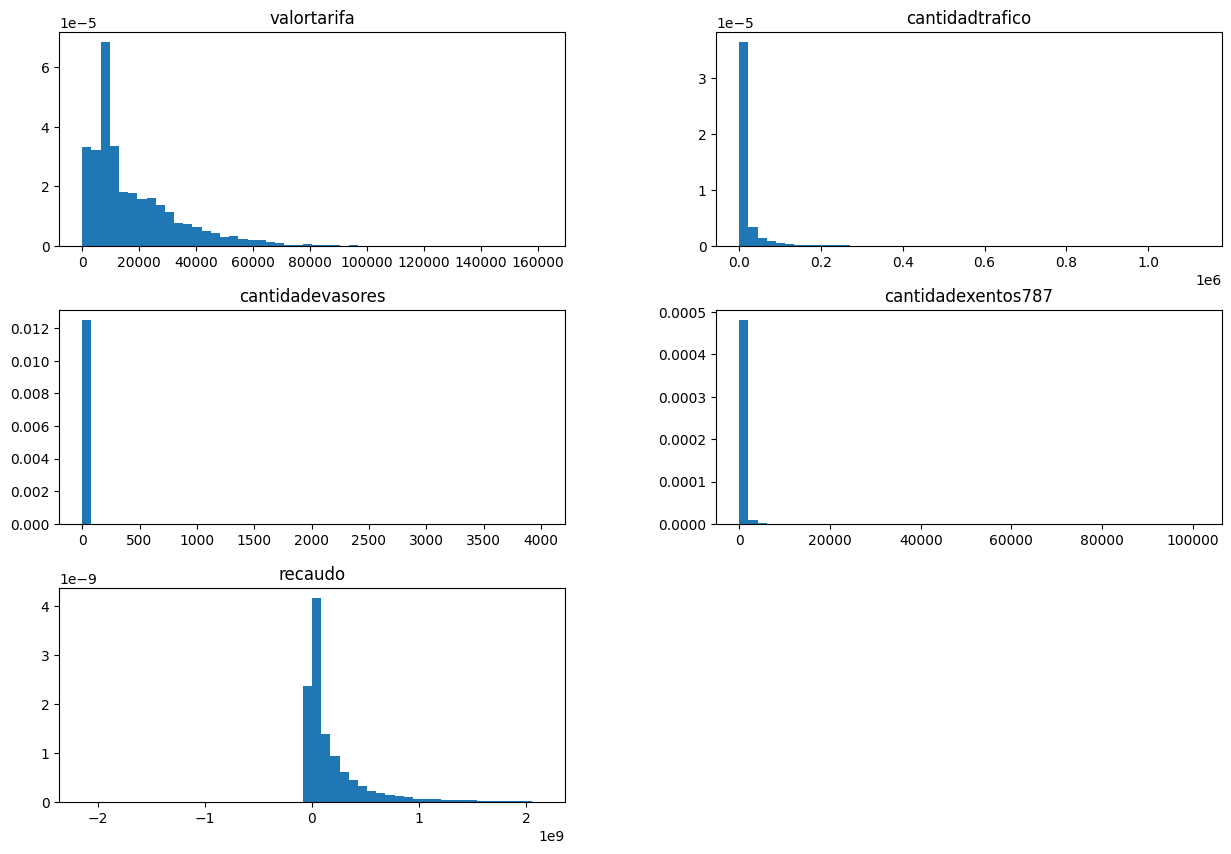

In [12]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
datos[['valortarifa', 'cantidadtrafico', 'cantidadevasores', 'cantidadexentos787', 'recaudo']].hist(ax=ax, density=True, grid=False, bins=50)
plt.show()

### Recaudo mensual

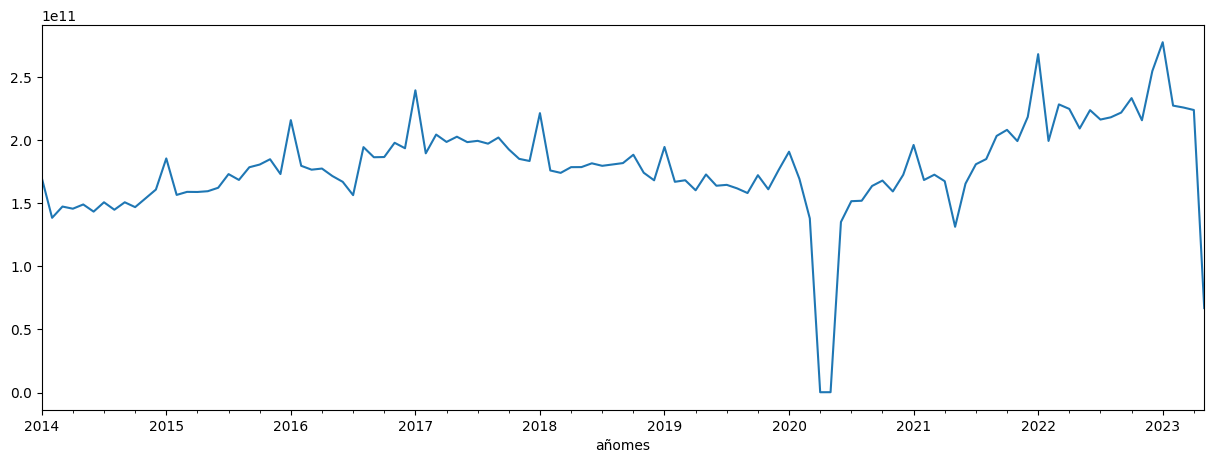

In [26]:
recaudo_mensual = datos[['recaudo', 'añomes']].groupby('añomes').sum().reset_index()
recaudo_mensual.plot(x='añomes', y='recaudo', rot=0, legend=False, figsize=(15, 5))
plt.show()

### Tarifa promedio anual

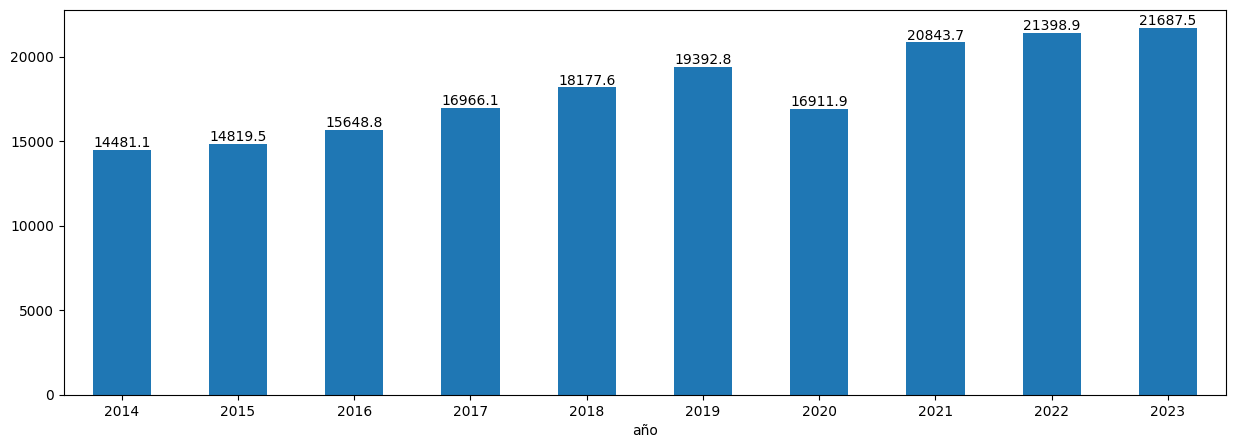

In [13]:
tarifa_anual = datos[['valortarifa', 'año']].groupby('año').mean().reset_index()
ax = tarifa_anual.plot.bar(x='año', y='valortarifa', rot=0, legend=False, figsize=(15, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Total tráfico vehicular anual 

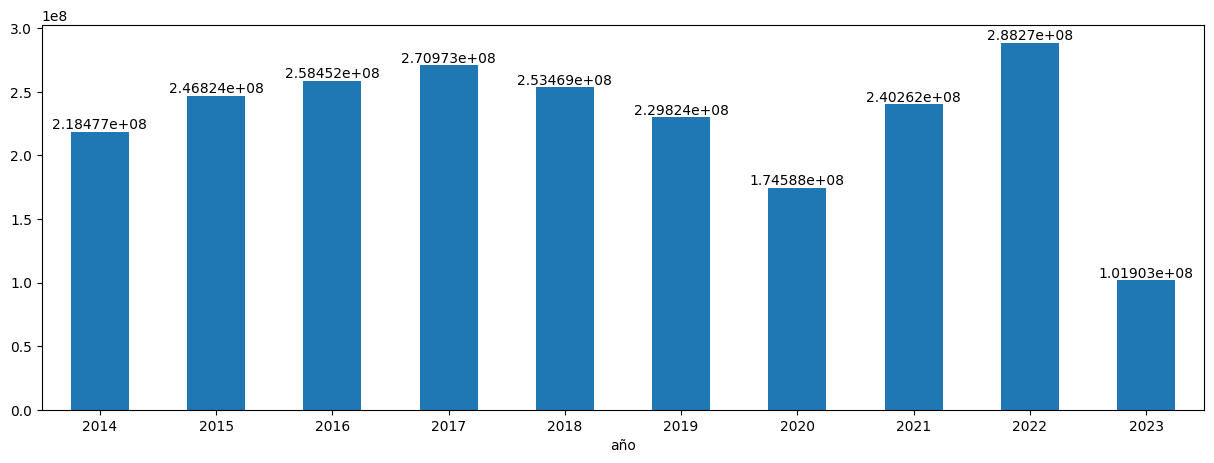

In [15]:
trafico_anual = datos[['cantidadtrafico', 'año']].groupby('año').sum().reset_index()
ax = trafico_anual.plot.bar(x='año', y='cantidadtrafico', rot=0, legend=False, figsize=(15, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Total recaudo anual

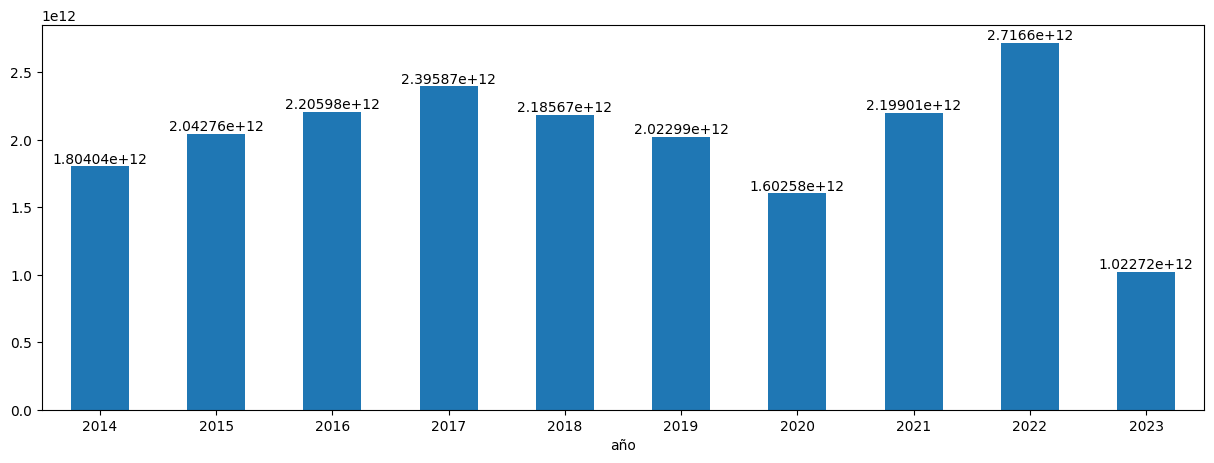

In [16]:
recaudo_anual = datos[['recaudo', 'año']].groupby('año').sum().reset_index()
ax = recaudo_anual.plot.bar(x='año', y='recaudo', rot=0, legend=False, figsize=(15, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Total evasores anual

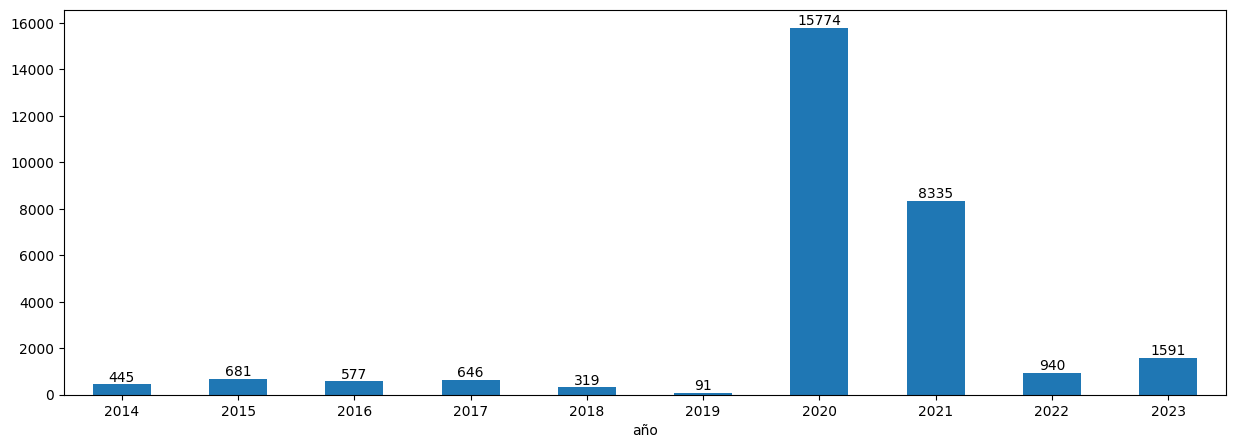

In [17]:
evasores_anual = datos[['cantidadevasores', 'año']].groupby('año').sum().reset_index()
ax = evasores_anual.plot.bar(x='año', y='cantidadevasores', rot=0, legend=False, figsize=(15, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Total exentos anual

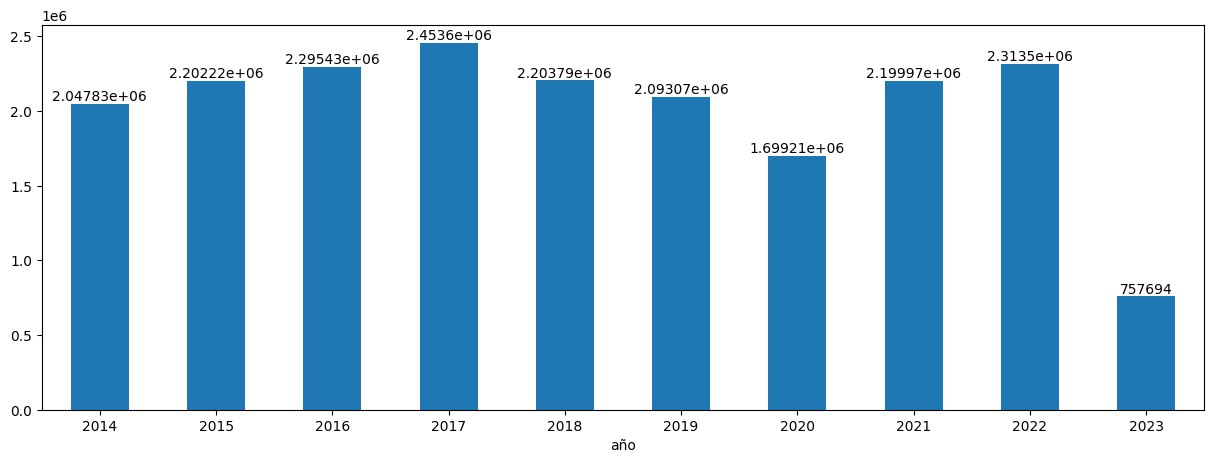

In [19]:
exentos_anual = datos[['cantidadexentos787', 'año']].groupby('año').sum().reset_index()
ax = exentos_anual.plot.bar(x='año', y='cantidadexentos787', rot=0, legend=False, figsize=(15, 5))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

El conjunto de datos inicial cuenta con cerca de 115 mil registros y 9 variables, todas ellas categóricas. Adicionalmente, las columnas *cantidadevasores* y *cantidadexentos787* registran aproximadamente 18 mil valores faltantes cada una.

Con el fin de realizar un mejor análisis exploratorio de los datos, se transformaron los campos *desde* y *hasta* a formato fecha, se convertieron los valores de las variables *valortarifa*, *cantidadtrafico*, *cantidadevasores* y *cantidadexentos787* a números enteros y se crearon las columnas *año*, *añomes* y *recaudo*.

Los resultados de las estadísticas descriptivas de las variables numéricas muestran, entre otras cosas, que los datos se encuentran en un rango entre enero de 2014 y mayo de 2023. Adicionalmente, la tarifa promedio que se cobró en los peajes durante dicho periodo fue cercana a los 18 mil pesos colombianos. Pasando a las variables categóricas, se pudo observar que 147 peajes estuvieron inscritos en la ANI en el rango de tiempo en mención, mientras que el número de categorías de tarifa fue de 45.

Por otro lado, los boxplots de las variables *valortarifa*, *cantidadtrafico*, *cantidadevasores*, *cantidadexentos787* y *recaudo* reflejaron la existencia de valores atípicos en los datos de cada una de ellas. Igualmente, los histogramas dieron a conocer que los datos de dichas columnas tienen asimetría positiva.

Es importante mencionar los resultados arrojados por las diferentes visualizaciones, empezando por la serie de recaudo mensual en donde se alcanza a apreciar una ligera tendencia positiva la cual se ve significativamente afectada por el bajo recaudo captado durante el segundo trimestre del año 2020 debido a que en ese periodo arrancaron las medidas gubernamentales para frenar los contagios por COVID-19. También, se tiene el promedio de la tarifa anual la cual exhibe una tendencia ascendente, igualmente afectada por la contingencia del COVID-19. Por el lado del total anual del tráfico vehicular y del recaudo, se puede observar que el año 2017 sufrió un punto de inflexión en donde venía con un comportamiento al alza, pero que después empezó a descender hasta que llegar su punto más bajo en 2020, año en el que vuelve a presentarse un nuevo punto de inflexión y los valores de dichas variables empiezan a aumentar significativamente. Un comportamiento similar lo manifiesta el total de exentos por año. Finalmente, vale la pena mencionar el crecimiento exponencial en la cantidad de evasores que hubo en el 2020 frente al 2019 y, a pesar de que el 2021 bajó casi a la mitad, el valor siguió siendo alto comparado con los demás periodos.